In [1]:
!pip install quandl

In [1]:
import quandl

In [4]:
data = quandl.get("BITFINEX/BTCUSD")

In [5]:
data

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.900000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.000000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.500000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.000000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.989900,473.83,505.01065,507.4999,502.5313,507.49,8963.618369
...,...,...,...,...,...,...,...
2019-11-03,9400.600000,9100.00,9232.55000,9232.6000,9232.5000,9232.60,3568.768666
2019-11-04,9645.000000,9152.00,9439.05000,9439.0000,9439.0000,9439.10,7456.809110
2019-11-05,9504.095482,9185.10,9355.10000,9356.1000,9354.1000,9356.10,3401.995961


In [6]:
data["Change"] = data["Last"].pct_change()

In [7]:
data = data[1:]

In [8]:
data.resample('W').sum()

,High,Low,Mid,Last,Bid,Ask,Volume,Change
Date,,,,,,,,
2014-04-20,2626.484900,2421.380000,2534.046403,2537.689900,2528.392806,2539.700000,74686.394938,-0.000792
2014-04-27,3456.235600,3267.940100,3345.577003,3342.600000,3342.139991,3349.014015,65185.944306,-0.116222
2014-05-04,3179.749600,3038.100000,3127.730000,3127.960000,3125.370100,3130.089900,52273.481419,-0.018700
2014-05-11,2700.630000,2586.048600,2642.228400,2641.499900,2639.780000,2644.676800,41756.114421,0.002997
2014-05-18,3135.870000,3081.860000,3115.030000,3115.300000,3113.180000,3116.880000,13753.022666,0.023666
...,...,...,...,...,...,...,...,...
2019-10-13,59848.165344,57259.859801,58692.100000,58682.644212,58687.100000,58697.100000,36053.913340,0.053849
2019-10-20,57814.346628,55945.200000,56836.750000,56836.656537,56836.400000,56837.100000,29372.365236,-0.006623
2019-10-27,61446.964307,56107.700000,58667.150000,58671.300000,58665.900000,58668.400000,85698.651856,0.172594


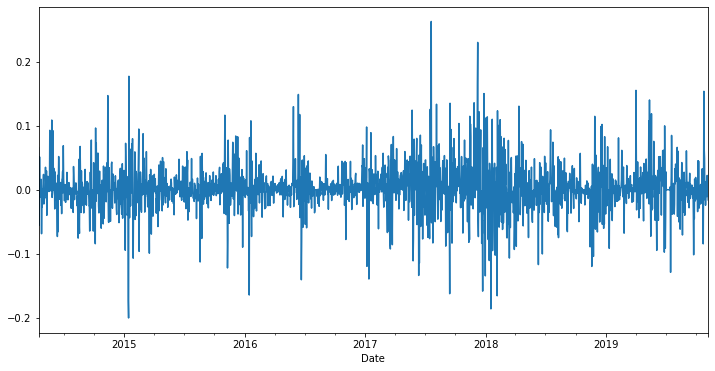

In [14]:
data["Change"].resample('D').sum().plot(figsize=(12,6))

In [10]:
import edhec_risk_kit as erk

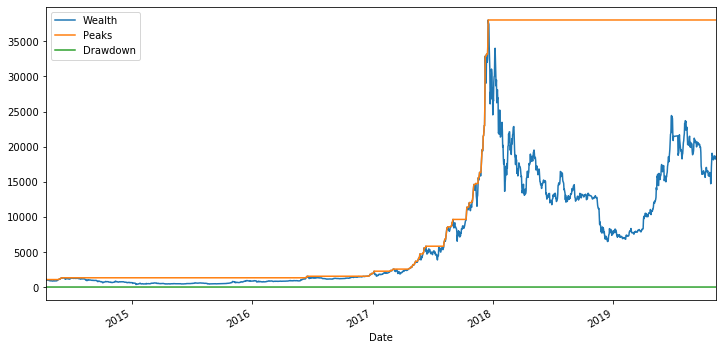

In [13]:
erk.drawdown(data["Change"]).plot(figsize=(12,6))

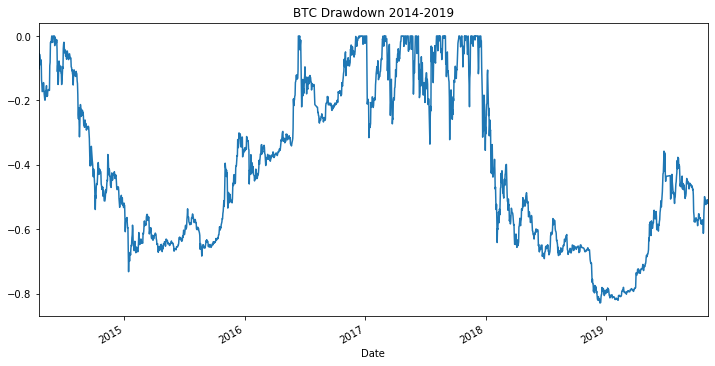

In [19]:
erk.drawdown(data["Change"])["Drawdown"].plot(title="BTC Drawdown 2014-2019", figsize=(12,6))

In [21]:
erk.kurtosis(data["Change"])

7.745460747790909

In [22]:
erk.skewness(data["Change"])

0.12676292751378954

In [23]:
import seaborn as sns

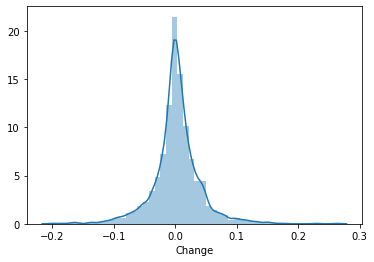

In [25]:
sns.distplot(data["Change"]);

In [33]:
erk.annualized_volatility(data["Change"].resample('M').sum(),12)

0.7093568247597563

In [32]:
erk.annualized_return(data["Change"].resample('M').sum(),12)

0.693790161633554

In [40]:
erk.annualized_return(data["Change"].resample('D').sum(),365)

0.6848198402073173

In [34]:
erk.cvar_historic(data["Change"])

0.09174853089533165

In [35]:
erk.var_gaussian(data["Change"])

0.06156150825160318

In [36]:
erk.var_historic(data["Change"])

0.06084967843140657

In [38]:
erk.sharpe_ratio(data["Change"].resample('M').sum(),12)

0.9099824206686413

In [41]:
erk.semideviation(data["Change"])

0.02888781392439406

In [42]:
data["Change"].std()

0.03878311040369009

In [43]:
data_btc = data

# Multi-Asset Efficient Frontier and Markowitz

In [2]:
data_btc = quandl.get("BITFINEX/BTCUSD")
data_btc["Change"] = data_btc["Last"].pct_change()

data_eth = quandl.get("BITFINEX/ETHUSD")
data_eth["Change"] = data_eth["Last"].pct_change()

data_xrp = quandl.get("BITFINEX/XRPUSD")
data_xrp["Change"] = data_xrp["Last"].pct_change()

In [3]:
import pandas as pd

In [5]:
data = data.rename(columns={"Change": "ETH"})

In [6]:
data["BTC"] = data_btc["Change"]

In [7]:
data["XRP"] = data_xrp["Change"]

ETH


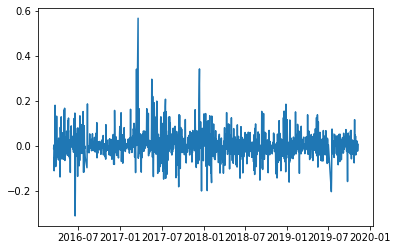

BTC


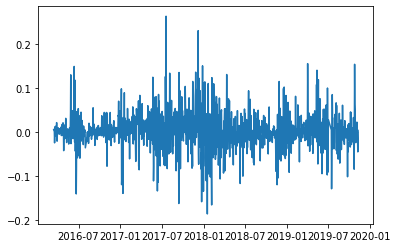

XRP


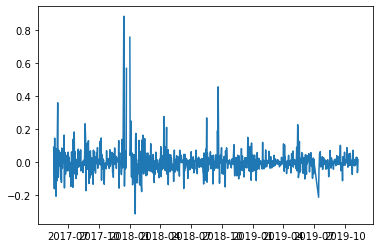

In [9]:
import matplotlib.pyplot as plt


for i in data.columns:
    print(i)
    plt.plot(data[i])
    plt.show()

In [10]:
data.cov()

,ETH,BTC,XRP
ETH,0.003648,0.001283,0.002650
BTC,0.001283,0.001675,0.001609
XRP,0.002650,0.001609,0.006658


In [17]:
data.head()

,ETH,BTC,XRP
Date,,,
2016-03-14,NaN,0.005553,NaN
2016-03-15,-0.012379,0.003376,NaN
2016-03-16,0.002742,0.003124,NaN
2016-03-17,-0.111875,0.002707,NaN
2016-03-18,-0.054363,-0.024634,NaN


In [151]:
import edhec_risk_kit as erk

In [103]:
estimated_return = erk.annualized_return(data["2017-03":"2017-12"],data["2017-03":"2017-12"].shape[0])

In [104]:
cov = data.cov()

In [105]:
estimated_return

ETH    43.025806
BTC    11.684201
XRP     2.520126
dtype: float64

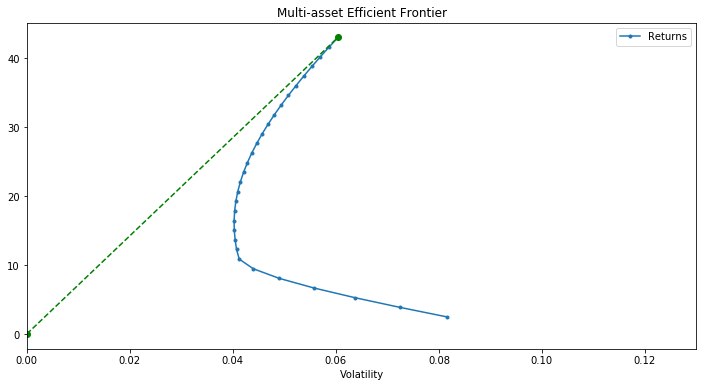

In [116]:
erk.plot_ef(30,estimated_return,cov,show_cml=True, riskfree=0.05)

In [120]:
import numpy as np 

rf = 0.05
returns =  erk.annualized_return(data["2017-03":"2017-12"], data["2017-03":"2017-12"].shape[0])
weight = erk.msr(rf, returns, data["2017-03":"2017-12"].cov())
erk.portfolio_return(weight, returns)
erk.portfolio_return(np.array([0.3, 0.3, 0.3]), returns)



17.169039954180782

In [121]:
data.head()

,ETH,BTC,XRP
Date,,,
2016-03-14,NaN,0.005553,NaN
2016-03-15,-0.012379,0.003376,NaN
2016-03-16,0.002742,0.003124,NaN
2016-03-17,-0.111875,0.002707,NaN
2016-03-18,-0.054363,-0.024634,NaN


In [128]:
erk.optimal_weights(24, estimated_return, cov)

[array([2.52077005e-18, 3.45752127e-13, 1.00000000e+00]),
 array([0.        , 0.19217613, 0.80782387]),
 array([5.55111512e-17, 3.84352268e-01, 6.15647732e-01]),
 array([1.38777878e-17, 5.76528406e-01, 4.23471594e-01]),
 array([6.93889390e-18, 7.68704545e-01, 2.31295455e-01]),
 array([1.38777878e-17, 9.60880678e-01, 3.91193217e-02]),
 array([0.04912416, 0.9359255 , 0.01495034]),
 array([0.1009438, 0.8990562, 0.       ]),
 array([0.15713481, 0.84286519, 0.        ]),
 array([0.21332582, 0.78667418, 0.        ]),
 array([0.26951684, 0.73048316, 0.        ]),
 array([3.25707849e-01, 6.74292151e-01, 5.55111512e-17]),
 array([0.38189886, 0.61810114, 0.        ]),
 array([0.43808987, 0.56191013, 0.        ]),
 array([4.94280886e-01, 5.05719114e-01, 1.38777878e-17]),
 array([5.50471899e-01, 4.49528101e-01, 5.55111512e-17]),
 array([0.60666291, 0.39333709, 0.        ]),
 array([0.66285392, 0.33714608, 0.        ]),
 array([0.71904494, 0.28095506, 0.        ]),
 array([7.75235949e-01, 2.2476405

In [129]:
data.cov()

,ETH,BTC,XRP
ETH,0.003648,0.001283,0.002650
BTC,0.001283,0.001675,0.001609
XRP,0.002650,0.001609,0.006658


In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [130]:
daily_return= data.dropna()
q1_return= daily_return.mean()*90
q1_cov= daily_return.cov()*90

In [147]:
pf_returns, pf_volatility, pf_sharpe_ratio, pf_coins_weights=([] for i in range(4))
num_portfolios= 5000
for portfolio in range(num_portfolios):
    weights= np.random.random(data.shape[1])
    weights /= np.sum(weights)
    returns = np.dot(weights, q1_return)
    volatility = np.sqrt(np.dot(weights.T, np.dot(q1_cov, weights)))
    sharpe = returns / volatility
    pf_coins_weights.append(weights)
    pf_returns.append(returns)
    pf_volatility.append(volatility)
    pf_sharpe_ratio.append(sharpe)

<IPython.core.display.Javascript object>


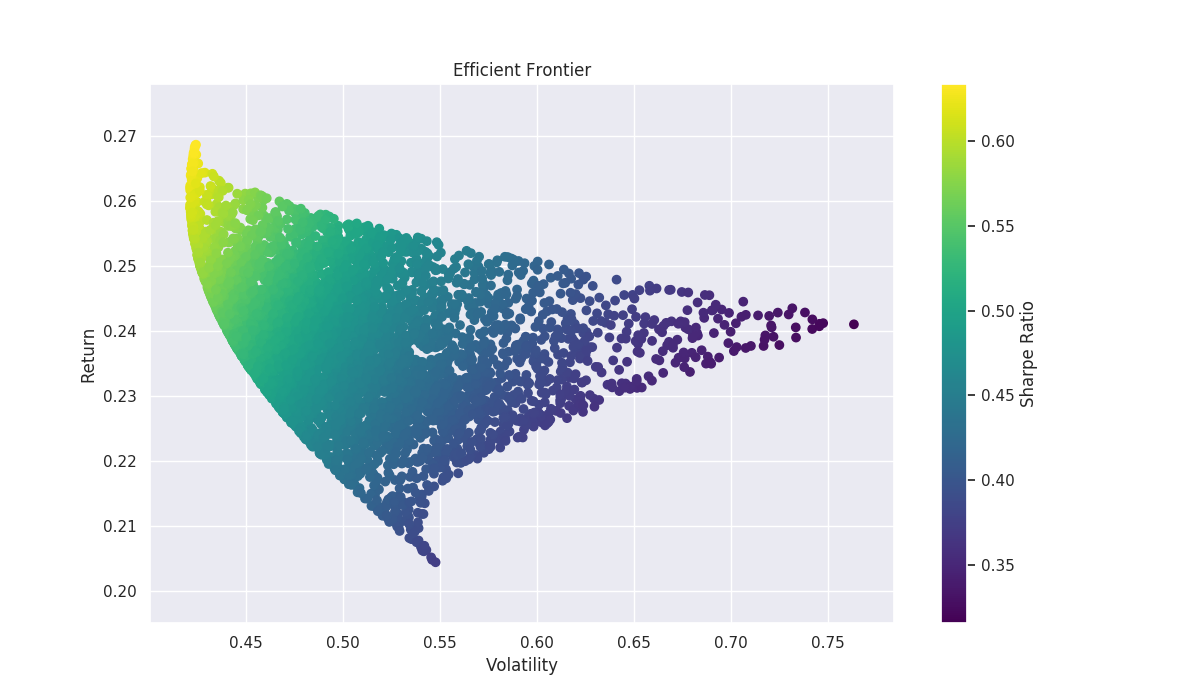

In [149]:
plt.figure(figsize=(12,7))
plt.scatter(x=pf_volatility, y=pf_returns, c= pf_sharpe_ratio, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
sns.set(style='darkgrid')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [155]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from scipy.optimize import minimize
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


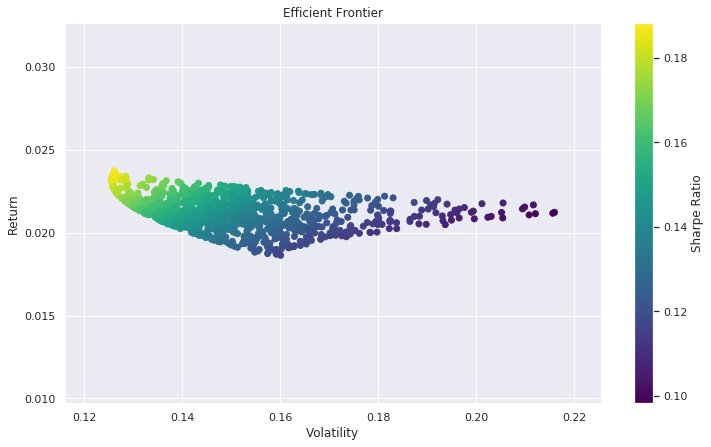

In [161]:
erk.plot_ef_random(data, 1000, 8)

In [162]:
data.shape[0]

1296

,ETH,BTC,XRP
Date,,,
2016-03-14,NaN,0.005553,NaN


In [170]:
data[-1:] - data[:1]

,ETH,BTC,XRP
Date,,,
2016-03-14,NaN,NaN,NaN
2019-11-09,NaN,NaN,NaN
